In [1]:
import requests
import statsmodels.formula.api as smf    # for OLS regression
import pylab as pl
import pandas as pd
import numpy as np
import json
import urllib 
import scipy.stats
import os
import sys
%pylab inline

#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely
import urllib.request
import gzip
from shapely.geometry import Point
from geopandas.tools import sjoin

Populating the interactive namespace from numpy and matplotlib


## Census tract shapefile

In [2]:
census = gpd.GeoDataFrame.from_file('cb_2016_36_tract_500k.shp')
census = census[['GEOID', 'geometry']]

In [3]:
census.crs

{'init': 'epsg:4269'}

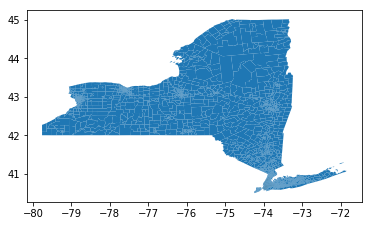

In [4]:
census.plot()

In [5]:
census.head()

,GEOID,geometry
0,36051031000,"POLYGON ((-77.841638 42.671857, -77.841531 42...."
1,36053030102,"POLYGON ((-75.69125 43.09777099999999, -75.686..."
2,36055000200,"POLYGON ((-77.63571399999999 43.17025, -77.632..."
3,36055001000,"POLYGON ((-77.592748 43.158266, -77.5916189999..."
4,36055002900,"POLYGON ((-77.59551499999999 43.152906, -77.59..."


## Floodzone FIRM07

floodzone07 = pd.read_csv('pluto_FIRM07.csv')
floodzone07.Tract2010 = floodzone07.Tract2010*100
floodzone07.Tract2010 = floodzone07.Tract2010.astype('str')
floodzone07.Tract2010 = floodzone07.Tract2010.str.zfill(6)
floodzone07.Tract2010 = floodzone07.Tract2010.astype('int')
floodzone07.Tract2010 = floodzone07.Tract2010 + floodzone07.Boro*1000000

floodzone07.head()

floodzone07.rename(columns={'Tract2010':'GEOID'}, inplace=True)

floodzone07.GEOID = floodzone07.GEOID.astype('str')

In [6]:
floodzone07 = pd.read_csv('floodzone07_wGEOID.csv')

In [7]:
floodzone07.GEOID = floodzone07.GEOID.astype('str')
floodzone07.head()

,Unnamed: 0,SchoolDist,ZipCode,PolicePrct,LandUse,BBLE,Tract2010,GEOID,Boro
0,0,13.0,11201.0,84.0,11.0,3000010001,21,36047002100,36047
1,1,13.0,11201.0,84.0,5.0,3000010050,21,36047002100,36047
2,2,13.0,11201.0,84.0,4.0,3000017501,21,36047002100,36047
3,3,13.0,11201.0,84.0,7.0,3000030001,21,36047002100,36047
4,4,13.0,11201.0,84.0,7.0,3000030005,21,36047002100,36047


In [8]:
tract_floodzone07 = gpd.GeoDataFrame.merge(census, floodzone07, how='inner', on='GEOID')

In [9]:
tract_floodzone07 = tract_floodzone07[['GEOID','geometry']]

In [10]:
tract_floodzone07.head()

,GEOID,geometry
0,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
1,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
2,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
3,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
4,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."


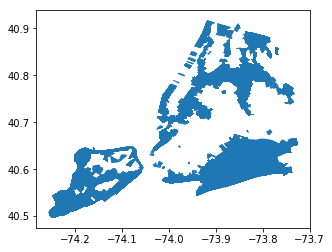

In [11]:
tract_floodzone07.plot()

## Floodzone FIRM15

floodzone15.Tract2010 = floodzone15.Tract2010*100
floodzone15.Tract2010 = floodzone15.Tract2010.astype('str')
floodzone15.Tract2010 = floodzone15.Tract2010.str.zfill(6)
floodzone15.Tract2010 = floodzone15.Tract2010.astype('int')
floodzone15.Tract2010 = floodzone15.Tract2010 + floodzone15.Boro*1000000

floodzone15.rename(columns={'Tract2010':'GEOID'}, inplace=True)

floodzone15.GEOID = floodzone15.GEOID.astype('str')

In [12]:
floodzone15 = pd.read_csv('floodzone15_wGEOID.csv')

In [13]:
floodzone15.GEOID = floodzone15.GEOID.astype('str')
floodzone15.head()

,Unnamed: 0,SchoolDist,ZipCode,PolicePrct,LandUse,BBLE,Tract2010,GEOID,Boro
0,0,1.0,10009.0,9.0,2.0,1003750001,2601,36061002601,36061
1,1,1.0,10009.0,9.0,11.0,1003760001,2602,36061002602,36061
2,2,1.0,10009.0,9.0,4.0,1003760003,2602,36061002602,36061
3,3,1.0,10009.0,9.0,4.0,1003760004,2602,36061002602,36061
4,4,1.0,10009.0,9.0,2.0,1003760005,2602,36061002602,36061


In [14]:
tract_floodzone15 = gpd.GeoDataFrame.merge(census, floodzone15, how='inner', on='GEOID')

In [15]:
tract_floodzone15 = tract_floodzone15[['GEOID','geometry']]

In [16]:
tract_floodzone15.head()

,GEOID,geometry
0,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
1,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
2,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
3,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
4,36061001300,"POLYGON ((-74.015513 40.707707, -74.014697 40...."


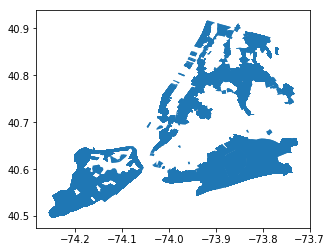

In [17]:
tract_floodzone15.plot()

In [18]:
crime12 = pd.read_csv('12crime.csv')
crime12.head()

,﻿CMPLNT_FR_DT,LAW_CAT_CD,BORO_NM,Latitude,Longitude
0,01/01/2012,FELONY,QUEENS,40.750679,-73.885427
1,01/01/2012,MISDEMEANOR,BRONX,40.808339,-73.881044
2,01/01/2012,FELONY,MANHATTAN,40.753163,-73.968330
3,01/01/2012,MISDEMEANOR,MANHATTAN,40.731165,-73.984259
4,01/01/2012,MISDEMEANOR,QUEENS,40.741540,-73.922349


## Crime Year2012

In [35]:
crime12 = pd.read_csv('12crime.csv')
felony12 = crime12[crime12['LAW_CAT_CD'] == 'FELONY'][['Latitude','Longitude']]
misdemeanor12 = crime12[crime12['LAW_CAT_CD'] == 'MISDEMEANOR'][['Latitude','Longitude']]
violation12 = crime12[crime12['LAW_CAT_CD'] == 'VIOLATION'][['Latitude','Longitude']]

### Felony 2012

In [36]:
felony12 = felony12[['Latitude','Longitude']]
felony12['geometry'] = felony12.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
felony12 = felony12.geometry
point1 = gpd.GeoDataFrame(felony12)

In [37]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
felony12_firm07 = pointInPolys1.groupby('GEOID').count()
felony12_firm07.reset_index(inplace=True)
felony12_firm07 = felony12_firm07[['GEOID','geometry']]
felony12_firm07.columns = [['GEOID','number']]

In [38]:
felony12_firm07.to_csv('felony12_firm07.csv')

In [39]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
felony12_firm15 = pointInPolys1.groupby('GEOID').count()
felony12_firm15.reset_index(inplace=True)
felony12_firm15 = felony12_firm15[['GEOID','geometry']]
felony12_firm15.columns = [['GEOID','number']]

In [40]:
felony12_firm15.to_csv('felony12_firm15.csv')

### Misdemeanor 2012

In [46]:
misdemeanor12 = misdemeanor12[['Latitude','Longitude']]
misdemeanor12['geometry'] = misdemeanor12.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
misdemeanor12 = misdemeanor12.geometry
point1 = gpd.GeoDataFrame(misdemeanor12)

In [47]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
misdemeanor12_firm07 = pointInPolys1.groupby('GEOID').count()
misdemeanor12_firm07.reset_index(inplace=True)
misdemeanor12_firm07 = misdemeanor12_firm07[['GEOID','geometry']]
misdemeanor12_firm07.columns = [['GEOID','number']]

In [48]:
misdemeanor12_firm07.to_csv('misdemeanor12_firm07.csv')

In [49]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
misdemeanor12_firm15 = pointInPolys1.groupby('GEOID').count()
misdemeanor12_firm15.reset_index(inplace=True)
misdemeanor12_firm15 = misdemeanor12_firm15[['GEOID','geometry']]
misdemeanor12_firm15.columns = [['GEOID','number']]

In [50]:
misdemeanor12_firm15.to_csv('misdemeanor12_firm15.csv')

### Violation 2012

In [51]:
violation12 = violation12[['Latitude','Longitude']]
violation12['geometry'] = violation12.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
violation12 = violation12.geometry
point1 = gpd.GeoDataFrame(violation12)

In [52]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
violation12_firm07 = pointInPolys1.groupby('GEOID').count()
violation12_firm07.reset_index(inplace=True)
violation12_firm07 = violation12_firm07[['GEOID','geometry']]
violation12_firm07.columns = [['GEOID','number']]

In [53]:
violation12_firm07.to_csv('violation12_firm07.csv')

In [54]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
violation12_firm15 = pointInPolys1.groupby('GEOID').count()
violation12_firm15.reset_index(inplace=True)
violation12_firm15 = violation12_firm15[['GEOID','geometry']]
violation12_firm15.columns = [['GEOID','number']]

In [55]:
violation12_firm15.to_csv('violation12_firm15.csv')

## Crime Year2013

In [56]:
crime13 = pd.read_csv('13crime.csv')
felony13 = crime13[crime13['LAW_CAT_CD'] == 'FELONY'][['Latitude','Longitude']]
misdemeanor13 = crime13[crime13['LAW_CAT_CD'] == 'MISDEMEANOR'][['Latitude','Longitude']]
violation13 = crime13[crime13['LAW_CAT_CD'] == 'VIOLATION'][['Latitude','Longitude']]

### Felony 2013

In [57]:
felony13 = felony13[['Latitude','Longitude']]
felony13['geometry'] = felony13.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
felony13 = felony13.geometry
point1 = gpd.GeoDataFrame(felony13)

In [58]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
felony13_firm07 = pointInPolys1.groupby('GEOID').count()
felony13_firm07.reset_index(inplace=True)
felony13_firm07 = felony13_firm07[['GEOID','geometry']]
felony13_firm07.columns = [['GEOID','number']]

In [59]:
felony13_firm07.to_csv('felony13_firm07.csv')

In [60]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
felony13_firm15 = pointInPolys1.groupby('GEOID').count()
felony13_firm15.reset_index(inplace=True)
felony13_firm15 = felony13_firm15[['GEOID','geometry']]
felony13_firm15.columns = [['GEOID','number']]

In [61]:
felony13_firm15.to_csv('felony13_firm15.csv')

### Misdemeanor 2013

In [62]:
misdemeanor13 = misdemeanor13[['Latitude','Longitude']]
misdemeanor13['geometry'] = misdemeanor13.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
misdemeanor13 = misdemeanor13.geometry
point1 = gpd.GeoDataFrame(misdemeanor13)

In [63]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
misdemeanor13_firm07 = pointInPolys1.groupby('GEOID').count()
misdemeanor13_firm07.reset_index(inplace=True)
misdemeanor13_firm07 = misdemeanor13_firm07[['GEOID','geometry']]
misdemeanor13_firm07.columns = [['GEOID','number']]

In [64]:
misdemeanor13_firm07.to_csv('misdemeanor13_firm07.csv')

In [65]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
misdemeanor13_firm15 = pointInPolys1.groupby('GEOID').count()
misdemeanor13_firm15.reset_index(inplace=True)
misdemeanor13_firm15 = misdemeanor13_firm15[['GEOID','geometry']]
misdemeanor13_firm15.columns = [['GEOID','number']]

In [66]:
misdemeanor13_firm15.to_csv('misdemeanor13_firm15.csv')

### Violation 2013

In [67]:
violation13 = violation13[['Latitude','Longitude']]
violation13['geometry'] = violation13.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
violation13 = violation13.geometry
point1 = gpd.GeoDataFrame(violation13)

In [68]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
violation13_firm07 = pointInPolys1.groupby('GEOID').count()
violation13_firm07.reset_index(inplace=True)
violation13_firm07 = violation13_firm07[['GEOID','geometry']]
violation13_firm07.columns = [['GEOID','number']]

In [69]:
violation13_firm07.to_csv('violation13_firm07.csv')

In [70]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
violation13_firm15 = pointInPolys1.groupby('GEOID').count()
violation13_firm15.reset_index(inplace=True)
violation13_firm15 = violation13_firm15[['GEOID','geometry']]
violation13_firm15.columns = [['GEOID','number']]

In [71]:
violation13_firm15.to_csv('violation13_firm15.csv')

## Crime Year2014

In [72]:
crime14 = pd.read_csv('14crime.csv')
felony14 = crime14[crime14['LAW_CAT_CD'] == 'FELONY'][['Latitude','Longitude']]
misdemeanor14 = crime14[crime14['LAW_CAT_CD'] == 'MISDEMEANOR'][['Latitude','Longitude']]
violation14 = crime14[crime14['LAW_CAT_CD'] == 'VIOLATION'][['Latitude','Longitude']]

### Felony 2014

In [73]:
felony14 = felony14[['Latitude','Longitude']]
felony14['geometry'] = felony14.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
felony14 = felony14.geometry
point1 = gpd.GeoDataFrame(felony14)

In [74]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
felony14_firm07 = pointInPolys1.groupby('GEOID').count()
felony14_firm07.reset_index(inplace=True)
felony14_firm07 = felony14_firm07[['GEOID','geometry']]
felony14_firm07.columns = [['GEOID','number']]

In [75]:
felony14_firm07.to_csv('felony14_firm07.csv')

In [76]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
felony14_firm15 = pointInPolys1.groupby('GEOID').count()
felony14_firm15.reset_index(inplace=True)
felony14_firm15 = felony14_firm15[['GEOID','geometry']]
felony14_firm15.columns = [['GEOID','number']]

In [77]:
felony14_firm15.to_csv('felony14_firm15.csv')

## Misdemeanor 2014

In [78]:
misdemeanor14 = misdemeanor14[['Latitude','Longitude']]
misdemeanor14['geometry'] = misdemeanor14.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
misdemeanor14 = misdemeanor14.geometry
point1 = gpd.GeoDataFrame(misdemeanor14)

In [79]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
misdemeanor14_firm07 = pointInPolys1.groupby('GEOID').count()
misdemeanor14_firm07.reset_index(inplace=True)
misdemeanor14_firm07 = misdemeanor14_firm07[['GEOID','geometry']]
misdemeanor14_firm07.columns = [['GEOID','number']]

In [80]:
misdemeanor14_firm07.to_csv('misdemeanor14_firm07.csv')

In [81]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
misdemeanor14_firm15 = pointInPolys1.groupby('GEOID').count()
misdemeanor14_firm15.reset_index(inplace=True)
misdemeanor14_firm15 = misdemeanor14_firm15[['GEOID','geometry']]
misdemeanor14_firm15.columns = [['GEOID','number']]

In [82]:
misdemeanor14_firm15.to_csv('misdemeanor14_firm15.csv')

### Violation 2014

In [83]:
violation14 = violation14[['Latitude','Longitude']]
violation14['geometry'] = violation14.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
violation14 = violation14.geometry
point1 = gpd.GeoDataFrame(violation14)

In [84]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
violation14_firm07 = pointInPolys1.groupby('GEOID').count()
violation14_firm07.reset_index(inplace=True)
violation14_firm07 = violation14_firm07[['GEOID','geometry']]
violation14_firm07.columns = [['GEOID','number']]

In [85]:
violation14_firm07.to_csv('violation14_firm07.csv')

In [86]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
violation14_firm15 = pointInPolys1.groupby('GEOID').count()
violation14_firm15.reset_index(inplace=True)
violation14_firm15 = violation14_firm15[['GEOID','geometry']]
violation14_firm15.columns = [['GEOID','number']]

In [87]:
violation14_firm15.to_csv('violation14_firm15.csv')

## Crime Year2015

In [19]:
crime15 = pd.read_csv('15crime.csv')
felony15 = crime15[crime15['LAW_CAT_CD'] == 'FELONY'][['Latitude','Longitude']]
misdemeanor15 = crime15[crime15['LAW_CAT_CD'] == 'MISDEMEANOR'][['Latitude','Longitude']]
violation15 = crime15[crime15['LAW_CAT_CD'] == 'VIOLATION'][['Latitude','Longitude']]

### Felony 2015

In [20]:
felony15 = felony15[['Latitude','Longitude']]
felony15['geometry'] = felony15.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
felony15 = felony15.geometry
point1 = gpd.GeoDataFrame(felony15)

In [21]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
felony15_firm07 = pointInPolys1.groupby('GEOID').count()
felony15_firm07.reset_index(inplace=True)
felony15_firm07 = felony15_firm07[['GEOID','geometry']]
felony15_firm07.columns = [['GEOID','number']]

In [22]:
felony15_firm07.to_csv('felony15_firm07.csv')

In [23]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
felony15_firm15 = pointInPolys1.groupby('GEOID').count()
felony15_firm15.reset_index(inplace=True)
felony15_firm15 = felony15_firm15[['GEOID','geometry']]
felony15_firm15.columns = [['GEOID','number']]

In [24]:
felony15_firm15.to_csv('felony15_firm15.csv')

## Misdemeanor 2015

In [25]:
misdemeanor15 = misdemeanor15[['Latitude','Longitude']]
misdemeanor15['geometry'] = misdemeanor15.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
misdemeanor15 = misdemeanor15.geometry
point1 = gpd.GeoDataFrame(misdemeanor15)

In [26]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
misdemeanor15_firm07 = pointInPolys1.groupby('GEOID').count()
misdemeanor15_firm07.reset_index(inplace=True)
misdemeanor15_firm07 = misdemeanor15_firm07[['GEOID','geometry']]
misdemeanor15_firm07.columns = [['GEOID','number']]

In [27]:
misdemeanor15_firm07.to_csv('misdemeanor15_firm07.csv')

In [28]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
misdemeanor15_firm15 = pointInPolys1.groupby('GEOID').count()
misdemeanor15_firm15.reset_index(inplace=True)
misdemeanor15_firm15 = misdemeanor15_firm15[['GEOID','geometry']]
misdemeanor15_firm15.columns = [['GEOID','number']]

In [30]:
misdemeanor15_firm15.to_csv('misdemeanor15_firm15.csv')

### Violation 2015

In [32]:
violation15 = violation15[['Latitude','Longitude']]
violation15['geometry'] = violation15.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
violation15 = violation15.geometry
point1 = gpd.GeoDataFrame(violation15)

In [33]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
violation15_firm07 = pointInPolys1.groupby('GEOID').count()
violation15_firm07.reset_index(inplace=True)
violation15_firm07 = violation15_firm07[['GEOID','geometry']]
violation15_firm07.columns = [['GEOID','number']]

In [34]:
violation15_firm07.to_csv('violation15_firm07.csv')

In [35]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
violation15_firm15 = pointInPolys1.groupby('GEOID').count()
violation15_firm15.reset_index(inplace=True)
violation15_firm15 = violation15_firm15[['GEOID','geometry']]
violation15_firm15.columns = [['GEOID','number']]

In [36]:
violation15_firm15.to_csv('violation15_firm15.csv')

## Crime Year2016

In [ ]:
crime16 = pd.read_csv('16crime.csv')
felony16 = crime16[crime16['LAW_CAT_CD'] == 'FELONY'][['Latitude','Longitude']]
misdemeanor16 = crime16[crime16['LAW_CAT_CD'] == 'MISDEMEANOR'][['Latitude','Longitude']]
violation16 = crime16[crime16['LAW_CAT_CD'] == 'VIOLATION'][['Latitude','Longitude']]

### Felony 2016

In [ ]:
felony16 = felony16[['Latitude','Longitude']]
felony16['geometry'] = felony16.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
felony16 = felony16.geometry
point1 = gpd.GeoDataFrame(felony16)

In [ ]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
felony16_firm07 = pointInPolys1.groupby('GEOID').count()
felony16_firm07.reset_index(inplace=True)
felony16_firm07 = felony16_firm07[['GEOID','geometry']]
felony16_firm07.columns = [['GEOID','number']]

In [ ]:
felony16_firm07.to_csv('felony16_firm07.csv')

In [ ]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
felony16_firm15 = pointInPolys1.groupby('GEOID').count()
felony16_firm15.reset_index(inplace=True)
felony16_firm15 = felony16_firm15[['GEOID','geometry']]
felony16_firm15.columns = [['GEOID','number']]

In [ ]:
felony16_firm15.to_csv('felony16_firm15.csv')

## Misdemeanor 2016

In [ ]:
misdemeanor16 = misdemeanor16[['Latitude','Longitude']]
misdemeanor16['geometry'] = misdemeanor16.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
misdemeanor16 = misdemeanor16.geometry
point1 = gpd.GeoDataFrame(misdemeanor16)

In [ ]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
misdemeanor16_firm07 = pointInPolys1.groupby('GEOID').count()
misdemeanor16_firm07.reset_index(inplace=True)
misdemeanor16_firm07 = misdemeanor16_firm07[['GEOID','geometry']]
misdemeanor16_firm07.columns = [['GEOID','number']]

In [ ]:
misdemeanor16_firm07.to_csv('misdemeanor16_firm07.csv')

In [ ]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
misdemeanor16_firm15 = pointInPolys1.groupby('GEOID').count()
misdemeanor16_firm15.reset_index(inplace=True)
misdemeanor16_firm15 = misdemeanor16_firm15[['GEOID','geometry']]
misdemeanor16_firm15.columns = [['GEOID','number']]

In [ ]:
misdemeanor16_firm15.to_csv('misdemeanor16_firm15.csv')

### Violation 2016

In [ ]:
violation16 = violation16[['Latitude','Longitude']]
violation16['geometry'] = violation16.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
violation16 = violation16.geometry
point1 = gpd.GeoDataFrame(violation16)

In [ ]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
violation16_firm07 = pointInPolys1.groupby('GEOID').count()
violation16_firm07.reset_index(inplace=True)
violation16_firm07 = violation16_firm07[['GEOID','geometry']]
violation16_firm07.columns = [['GEOID','number']]

In [ ]:
violation16_firm07.to_csv('violation16_firm07.csv')

In [ ]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
violation16_firm15 = pointInPolys1.groupby('GEOID').count()
violation16_firm15.reset_index(inplace=True)
violation16_firm15 = violation16_firm15[['GEOID','geometry']]
violation16_firm15.columns = [['GEOID','number']]

In [ ]:
violation16_firm15.to_csv('violation16_firm15.csv')

## Crime Year2017

In [ ]:
crime17 = pd.read_csv('17crime.csv')
felony17 = crime17[crime17['LAW_CAT_CD'] == 'FELONY'][['Latitude','Longitude']]
misdemeanor17 = crime17[crime17['LAW_CAT_CD'] == 'MISDEMEANOR'][['Latitude','Longitude']]
violation17 = crime17[crime17['LAW_CAT_CD'] == 'VIOLATION'][['Latitude','Longitude']]

### Felony 2017

In [ ]:
felony17 = felony17[['Latitude','Longitude']]
felony17['geometry'] = felony17.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
felony17 = felony17.geometry
point1 = gpd.GeoDataFrame(felony17)

In [ ]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
felony17_firm07 = pointInPolys1.groupby('GEOID').count()
felony17_firm07.reset_index(inplace=True)
felony17_firm07 = felony17_firm07[['GEOID','geometry']]
felony17_firm07.columns = [['GEOID','number']]

In [ ]:
felony17_firm07.to_csv('felony17_firm07.csv')

In [ ]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
felony17_firm15 = pointInPolys1.groupby('GEOID').count()
felony17_firm15.reset_index(inplace=True)
felony17_firm15 = felony17_firm15[['GEOID','geometry']]
felony17_firm15.columns = [['GEOID','number']]

In [ ]:
felony17_firm15.to_csv('felony17_firm15.csv')

## Misdemeanor 2017

In [ ]:
misdemeanor17 = misdemeanor17[['Latitude','Longitude']]
misdemeanor17['geometry'] = misdemeanor17.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
misdemeanor17 = misdemeanor17.geometry
point1 = gpd.GeoDataFrame(misdemeanor17)

In [ ]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
misdemeanor17_firm07 = pointInPolys1.groupby('GEOID').count()
misdemeanor17_firm07.reset_index(inplace=True)
misdemeanor17_firm07 = misdemeanor17_firm07[['GEOID','geometry']]
misdemeanor17_firm07.columns = [['GEOID','number']]

In [ ]:
misdemeanor17_firm07.to_csv('misdemeanor17_firm07.csv')

In [ ]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
misdemeanor17_firm15 = pointInPolys1.groupby('GEOID').count()
misdemeanor17_firm15.reset_index(inplace=True)
misdemeanor17_firm15 = misdemeanor17_firm15[['GEOID','geometry']]
misdemeanor17_firm15.columns = [['GEOID','number']]

In [ ]:
misdemeanor17_firm15.to_csv('misdemeanor17_firm15.csv')

### Violation 2017

In [ ]:
violation17 = violation17[['Latitude','Longitude']]
violation17['geometry'] = violation17.apply(lambda z: Point(z['Longitude'], z['Latitude']), axis=1)
violation17 = violation17.geometry
point1 = gpd.GeoDataFrame(violation17)

In [ ]:
point1.crs = tract_floodzone07.crs
pointInPolys1 = sjoin(point1, tract_floodzone07, how='left')
violation17_firm07 = pointInPolys1.groupby('GEOID').count()
violation17_firm07.reset_index(inplace=True)
violation17_firm07 = violation17_firm07[['GEOID','geometry']]
violation17_firm07.columns = [['GEOID','num

In [ ]:
violation17_firm07.to_csv('violation17_firm07.csv')

In [ ]:
point1.crs = tract_floodzone15.crs
pointInPolys1 = sjoin(point1, tract_floodzone15, how='left')
violation17_firm15 = pointInPolys1.groupby('GEOID').count()
violation17_firm15.reset_index(inplace=True)
violation17_firm15 = violation17_firm15[['GEOID','geometry']]
violation17_firm15.columns = [['GEOID','number']]

In [ ]:
violation17_firm15.to_csv('violation17_firm15.csv')